In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('seaborn-notebook')
import matplotlib.patches as patches
plt.rcParams['figure.figsize'] = (14, 6)

In [2]:
# Load data for new snow line
REGION_ID = 3007
nsl = pd.read_csv(r"C:\Users\kmu\PycharmProjects\APS\aps\scripts\tmp\new_snow_line_{0}_20201201.csv".format(REGION_ID),
                  sep=";", header=0)
nsl.head()

,Date,Hour,Altitude
0,2020-12-02,5,-352.031738
1,2020-12-02,11,208.898438
2,2020-12-02,17,750.374023
3,2020-12-02,19,772.443359
4,2020-12-03,0,539.824219


In [3]:
# group by date and keep only the highest value
nsl_gr = nsl.groupby("Date").max()
nsl_gr.describe()

,Hour,Altitude
count,61.000000,61.000000
mean,20.180328,-249.578259
std,2.276754,724.869876
min,18.000000,-2041.881348
25%,18.000000,-737.804932
50%,19.000000,-111.553467
75%,23.000000,261.273071
max,23.000000,1007.044189


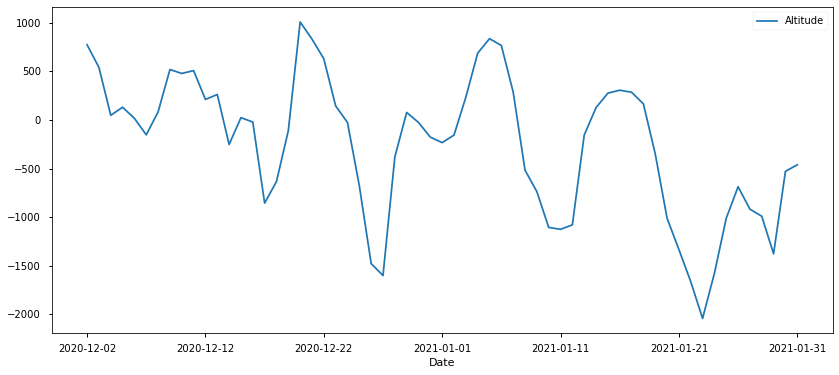

In [4]:
nsl_gr.plot(y='Altitude');

In [5]:
aw = pd.read_csv(r"C:\Users\kmu\PycharmProjects\varsomdata\localstorage\norwegian_avalanche_warnings_season_20_21.csv",
                 sep=";", header=0, index_col=0,
                 usecols=["index", "region_id", "region_name", "danger_level", "date_valid", "mountain_weather_precip_region", "mountain_weather_freezing_level", "mountain_weather_fl_hour_of_day_start", "mountain_weather_fl_hour_of_day_stop"],
                 parse_dates=["date_valid"])
for c in aw.columns:
    print(c)
aw.head(10)

region_id
region_name
date_valid
danger_level
mountain_weather_precip_region
mountain_weather_freezing_level
mountain_weather_fl_hour_of_day_start
mountain_weather_fl_hour_of_day_stop


,region_id,region_name,date_valid,danger_level,mountain_weather_precip_region,mountain_weather_freezing_level,mountain_weather_fl_hour_of_day_start,mountain_weather_fl_hour_of_day_stop
index,,,,,,,,
0,3037,Heiane,2020-12-01,1,0.0,500.0,NaN,NaN
1,3035,Vest-Telemark,2020-12-01,1,0.0,500.0,NaN,NaN
2,3034,Hardanger,2020-12-01,1,0.0,500.0,NaN,NaN
3,3032,Hallingdal,2020-12-01,1,0.0,500.0,NaN,NaN
4,3031,Voss,2020-12-01,1,0.0,500.0,NaN,NaN
5,3029,Indre Sogn,2020-12-01,2,0.0,500.0,NaN,NaN
6,3028,Jotunheimen,2020-12-01,2,0.0,500.0,NaN,NaN
7,3027,Indre Fjordane,2020-12-01,2,0.0,600.0,0.0,6.0
8,3024,Sunnmøre,2020-12-01,1,3.0,500.0,0.0,6.0


In [6]:
aw_region = aw[aw["region_id"]==REGION_ID]
aw_region.describe()

,region_id,danger_level,mountain_weather_precip_region,mountain_weather_freezing_level,mountain_weather_fl_hour_of_day_start,mountain_weather_fl_hour_of_day_stop
count,182.0,182.000000,82.000000,82.000000,25.000000,25.000000
mean,3007.0,0.901099,1.378049,135.365854,7.680000,13.680000
std,0.0,1.122890,1.947713,224.087698,7.652451,7.652451
min,3007.0,0.000000,0.000000,0.000000,0.000000,6.000000
25%,3007.0,0.000000,0.000000,0.000000,0.000000,6.000000
50%,3007.0,0.000000,0.000000,0.000000,6.000000,12.000000
75%,3007.0,2.000000,2.000000,200.000000,12.000000,18.000000
max,3007.0,3.000000,8.000000,800.000000,18.000000,24.000000


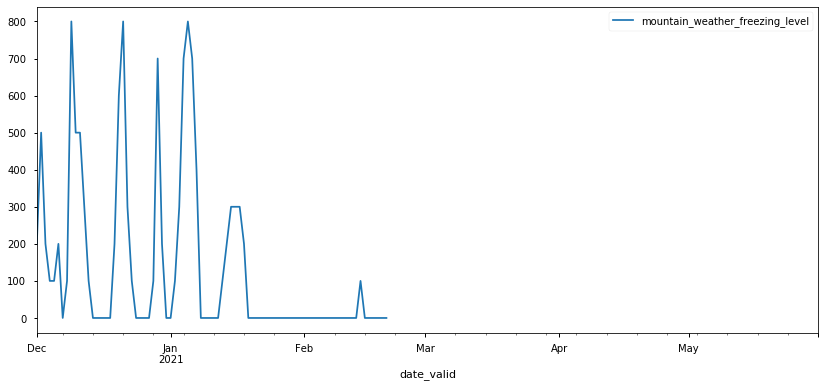

In [7]:
aw_region.plot(x="date_valid", y="mountain_weather_freezing_level")  # mountain_weather_precip_region

In [8]:
df_merged = nsl_gr.join(aw_region.set_index("date_valid"), how='left', lsuffix='nsl_', rsuffix='aw_', sort=False)
df_merged.describe()

,Hour,Altitude,region_id,danger_level,mountain_weather_precip_region,mountain_weather_freezing_level,mountain_weather_fl_hour_of_day_start,mountain_weather_fl_hour_of_day_stop
count,61.000000,61.000000,61.0,61.000000,61.000000,61.000000,23.000000,23.000000
mean,20.180328,-249.578259,3007.0,1.721311,0.868852,177.049180,7.565217,13.565217
std,2.276754,724.869876,0.0,0.635902,1.607020,245.216532,7.506519,7.506519
min,18.000000,-2041.881348,3007.0,1.000000,0.000000,0.000000,0.000000,6.000000
25%,18.000000,-737.804932,3007.0,1.000000,0.000000,0.000000,0.000000,6.000000
50%,19.000000,-111.553467,3007.0,2.000000,0.000000,100.000000,6.000000,12.000000
75%,23.000000,261.273071,3007.0,2.000000,1.000000,300.000000,12.000000,18.000000
max,23.000000,1007.044189,3007.0,3.000000,8.000000,800.000000,18.000000,24.000000


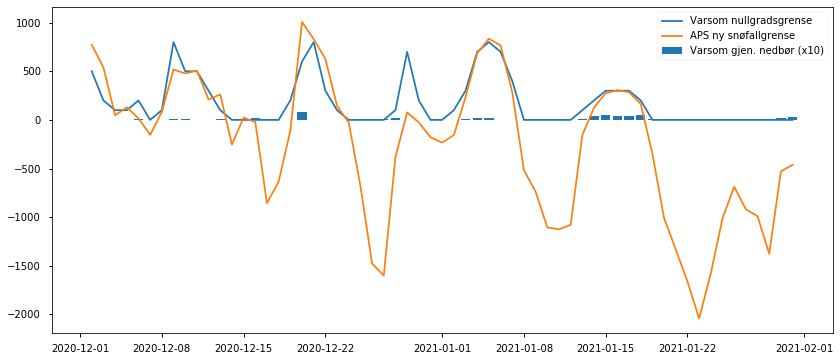

In [9]:
plt.plot(df_merged.index, df_merged["mountain_weather_freezing_level"], label="Varsom nullgradsgrense")
plt.bar(df_merged.index, df_merged["mountain_weather_precip_region"]*10, label="Varsom gjen. nedbør (x10)")
plt.plot(df_merged.index, df_merged["Altitude"], label="APS ny snøfallgrense")

plt.legend();

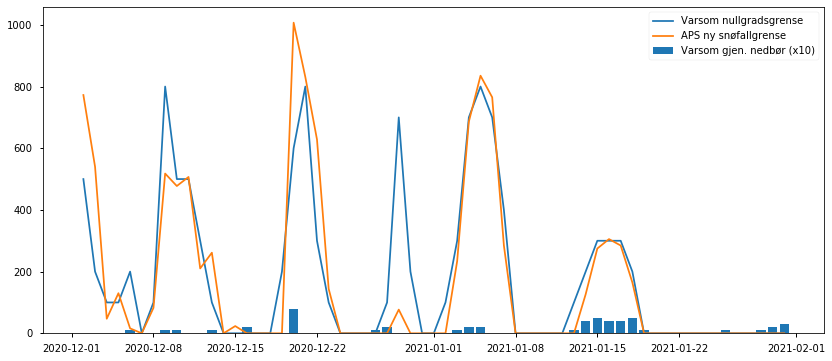

In [10]:
plt.plot(df_merged.index, df_merged["mountain_weather_freezing_level"], label="Varsom nullgradsgrense")
plt.bar(df_merged.index, df_merged["mountain_weather_precip_region"]*10, label="Varsom gjen. nedbør (x10)")
plt.plot(df_merged.index, np.clip(df_merged["Altitude"], a_min=0, a_max=None), label="APS ny snøfallgrense")

plt.legend();